# Load packages

In [ ]:
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from mlxtend.plotting import plot_decision_regions

# Load dataset

In [ ]:
dataset_dict = load_iris()
data = dataset_dict['data']
target = dataset_dict['target']
target_names = dataset_dict['target_names']

In [ ]:
data_df = pd.DataFrame(data)
data_df.columns = dataset_dict['feature_names']
data_df = data_df.assign(target = target)
data_df['target'] = data_df['target'].map(lambda x: target_names[x])

data_df.head(3)

# Clustering

### PCA + *k*-means

In [31]:
def kmeans(data, n_clusters, n_init=1, n_iters=100, tol=0.0001):
    clusterer = KMeans(
        n_clusters=n_clusters, 
        n_init=n_init, 
        max_iter=n_iters, 
        tol=tol, 
        random_state=14)

    clusterer.fit(data)
    all_predictions = clusterer.predict(data)
    centroids = clusterer.cluster_centers_
    return all_predictions, centroids, clusterer

In [32]:
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(data)

Experiment 1: Increasing the number of clusters (*k*)

e:\anaconda3\envs\um_lab1\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
e:\anaconda3\envs\um_lab1\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
e:\anaconda3\envs\um_lab1\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
e:\anaconda3\envs\um_lab1\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Wi

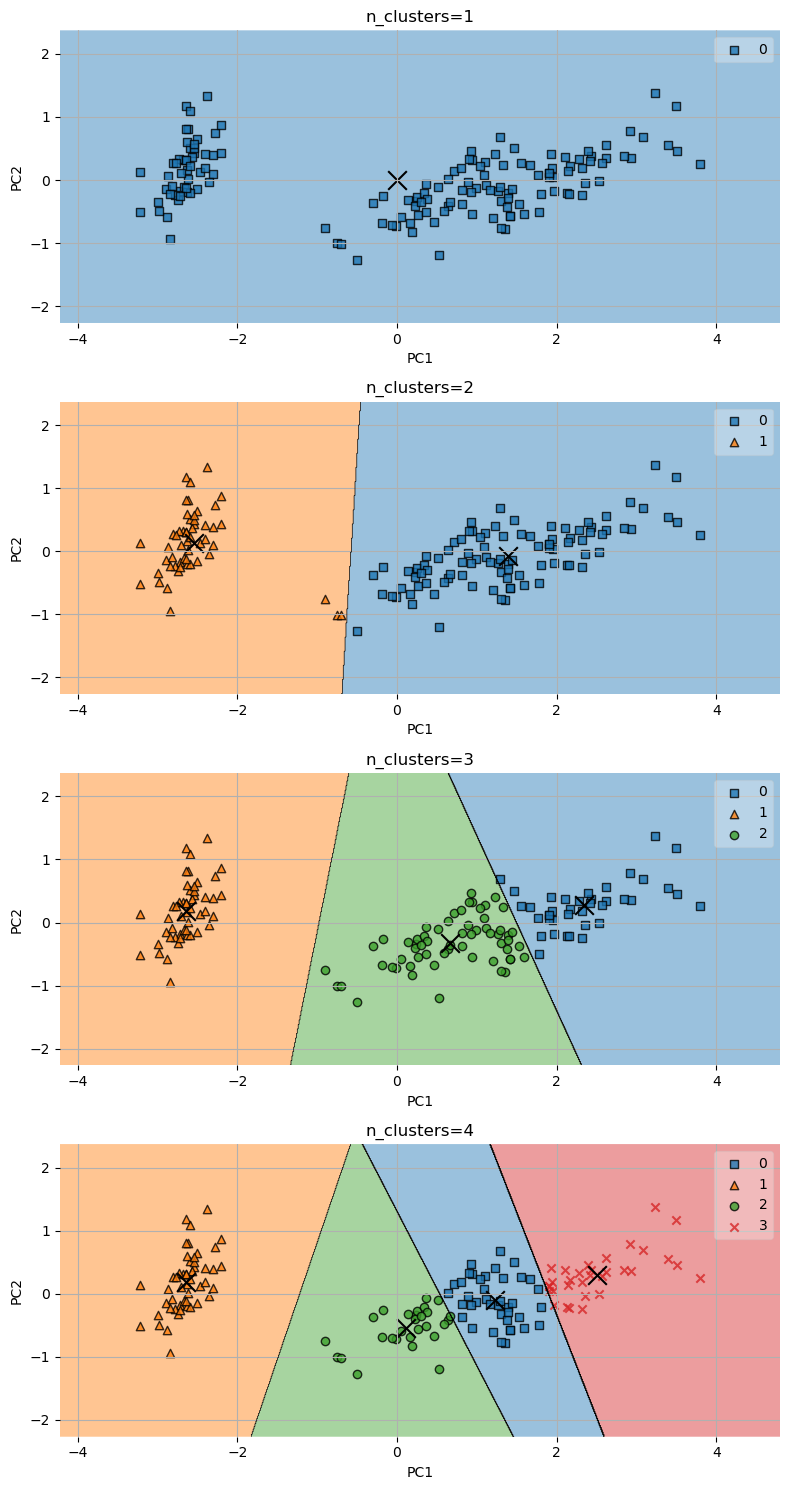

In [33]:
ns_clusters = [1,2,3,4]

plt.figure(figsize=(8,15))
for n, i in zip(ns_clusters, range(len(ns_clusters))):
    
    all_predictions, centroids, clusterer = kmeans(reduced_data, n_clusters=n)
    
    plt.subplot(len(ns_clusters),1,i+1)
    plot_decision_regions(reduced_data, all_predictions, clf=clusterer)
    plt.scatter(centroids[:,0], centroids[:,1], c='black', marker='x', s=180)
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title(f"n_clusters={n}")
    plt.tight_layout()
    plt.grid()

Experiment 2: Changes between iterations

e:\anaconda3\envs\um_lab1\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
e:\anaconda3\envs\um_lab1\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
e:\anaconda3\envs\um_lab1\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
e:\anaconda3\envs\um_lab1\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Wi

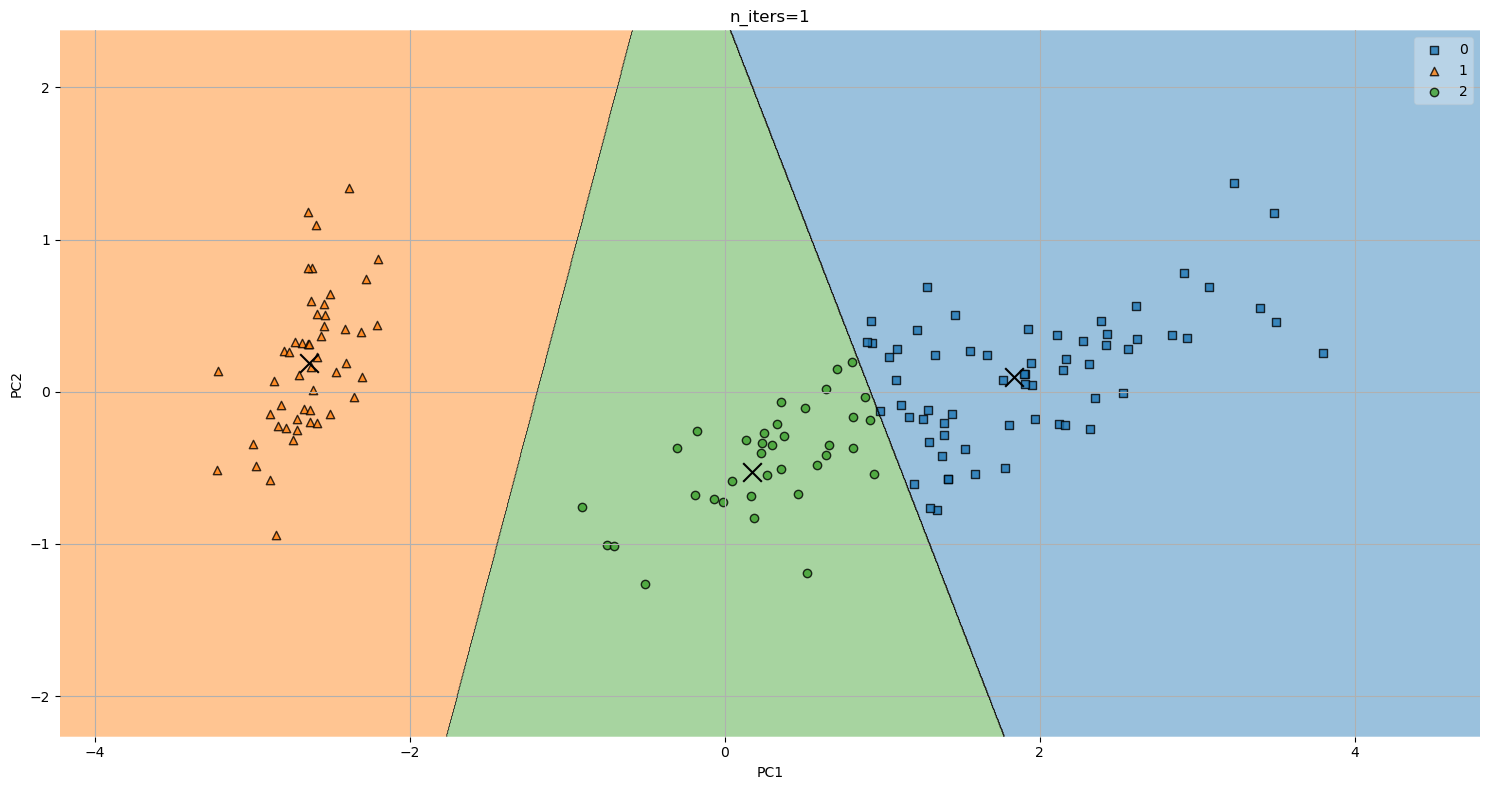

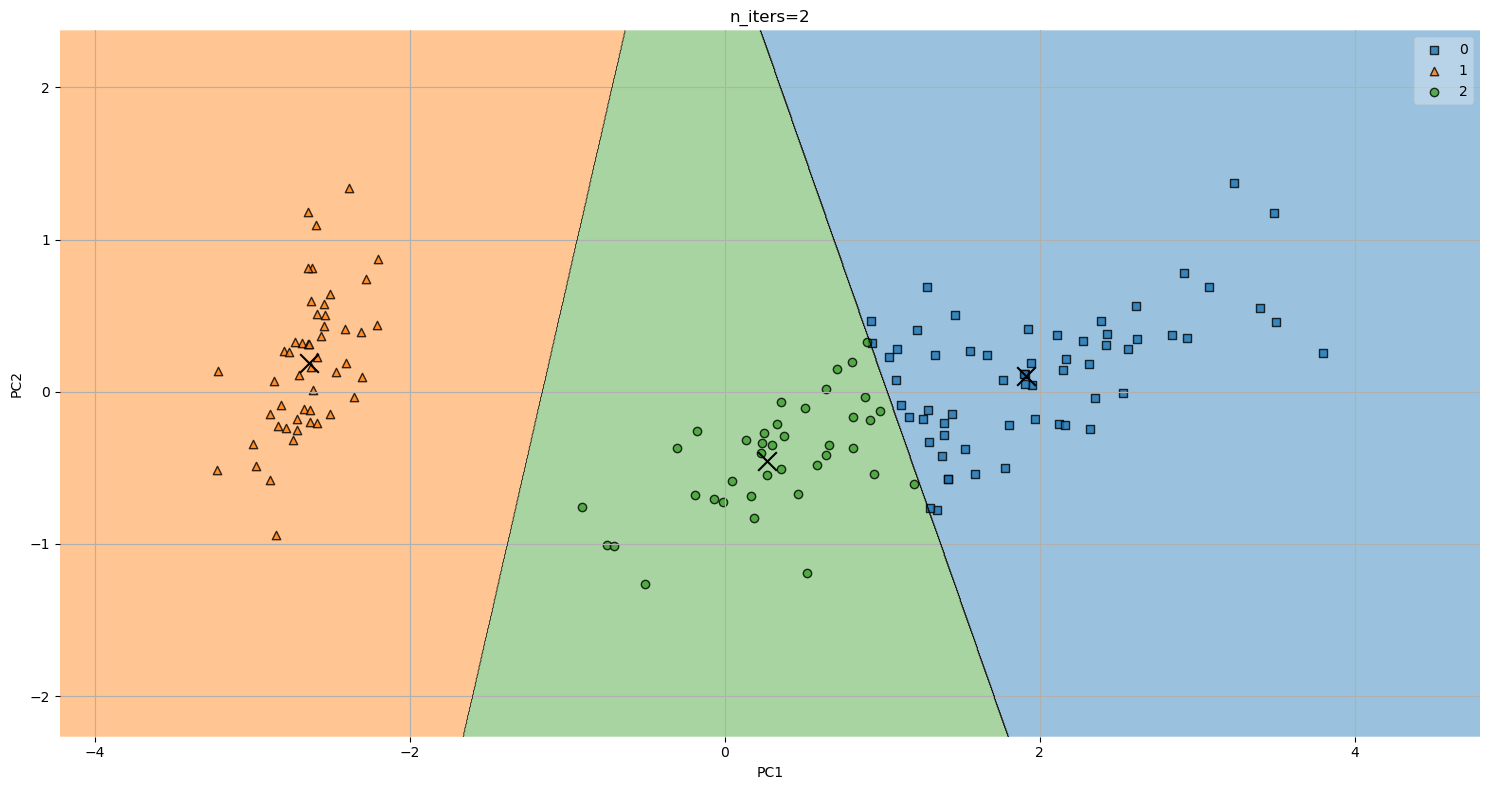

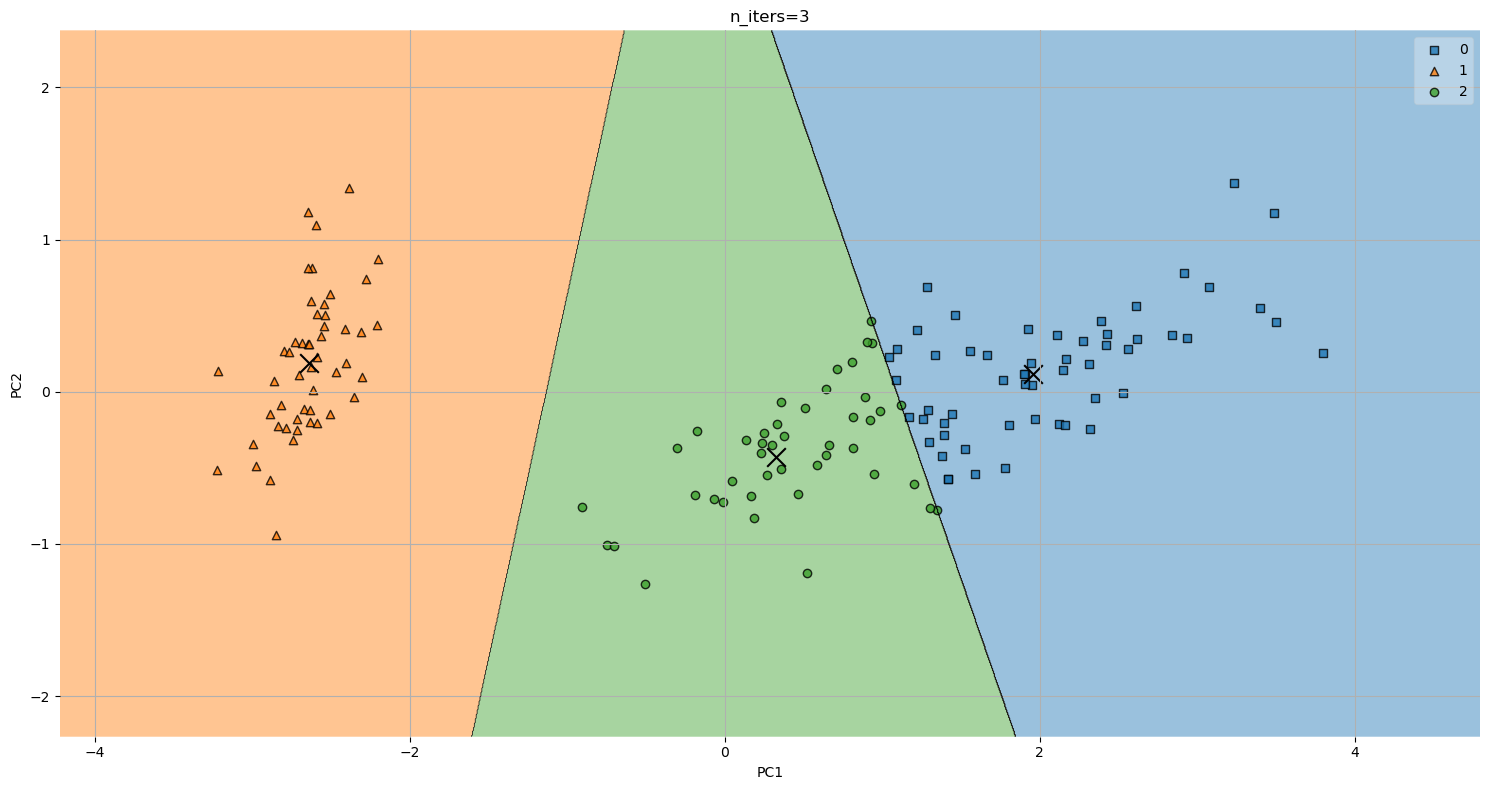

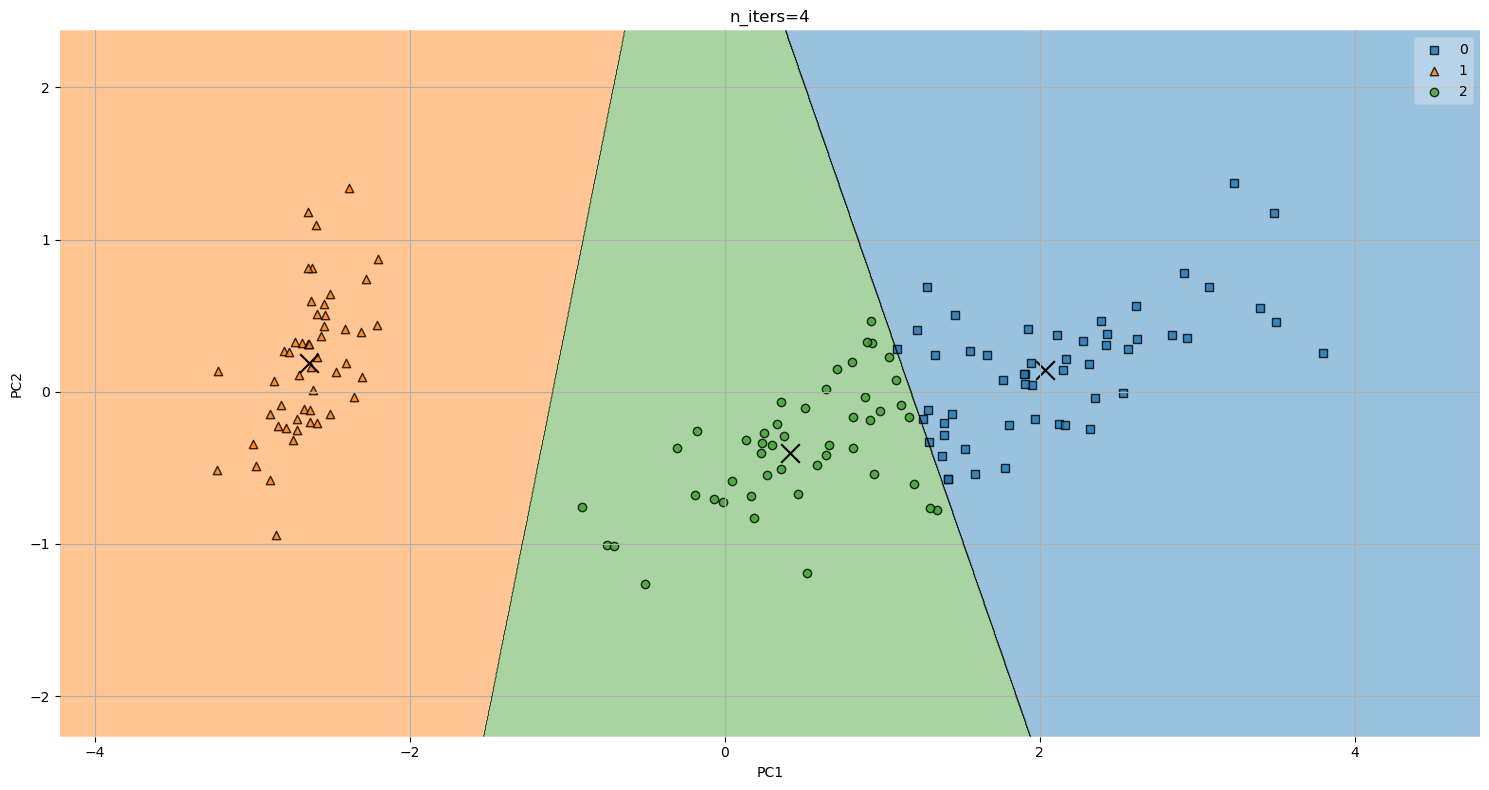

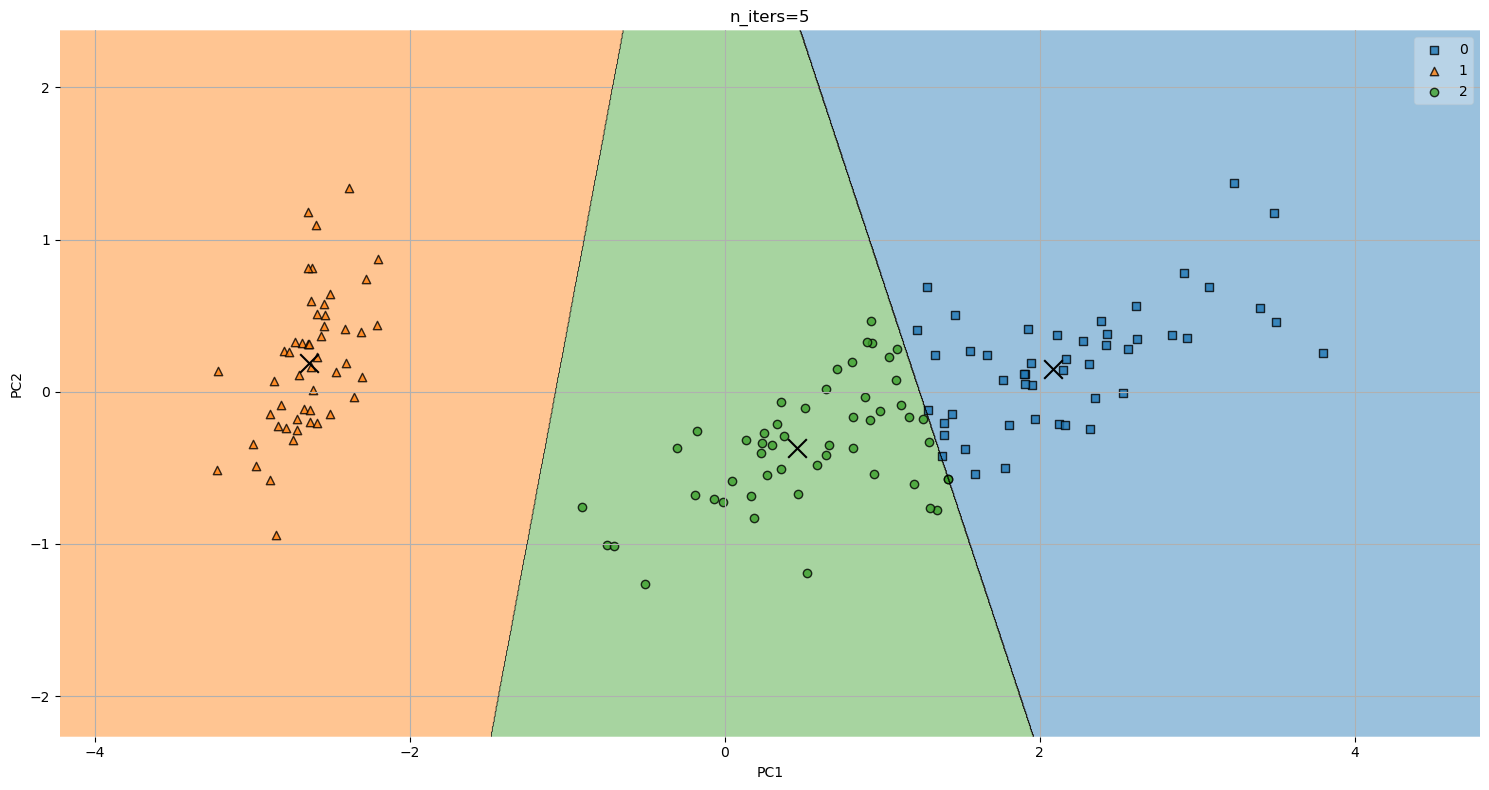

In [34]:
ns_iters = np.arange(1, 6)

for n, i in zip(ns_iters, range(len(ns_iters))):
    
    all_predictions, centroids, clusterer = kmeans(reduced_data, n_clusters=3, n_iters=n)

    plt.figure(figsize=(15,8))
    plot_decision_regions(reduced_data, all_predictions, clf=clusterer)
    plt.scatter(centroids[:,0], centroids[:,1], c='black', marker='x', s=180)
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title(f"n_iters={n}")
    plt.tight_layout()
    plt.grid()
    plt.savefig(f'plots\\kmeans_it_{str(n).zfill(3)}.png')